In [334]:
#Import all necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer

In [335]:
#Load the dataset
df = pd.read_csv('Uncleaned_DS_jobs.csv')
df.shape

(672, 14)

In [336]:
df.sample(3)

,index,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
169,169,Sr Data Analyst,$101K-$165K (Glassdoor est.),"Position location: Lake Mary, FLorBlue Bell, P...",United BioSource\n2.3,"Blue Bell, PA","Blue Bell, PA",1001 to 5000 employees,2003,Other Organization,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),"Covance, ICON"
518,518,Data Science Software Engineer,$212K-$331K (Glassdoor est.),We love programming and the excitement that co...,Klaviyo\n4.8,"Boston, MA","Boston, MA",201 to 500 employees,2012,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
370,370,AI Ops Data Scientist,$112K-$116K (Glassdoor est.),"Company\n\nAstraZeneca is a global, innovation...",AstraZeneca\n4.0,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,1913,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, GlaxoSmithKline, Novartis"


In [337]:
#Exploratory data analysis(EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              672 non-null    int64 
 1   Job Title          672 non-null    object
 2   Salary Estimate    672 non-null    object
 3   Job Description    672 non-null    object
 4   Company Name       672 non-null    object
 5   Location           672 non-null    object
 6   Headquarters       672 non-null    object
 7   Size               672 non-null    object
 8   Founded            672 non-null    int64 
 9   Type of ownership  672 non-null    object
 10  Industry           672 non-null    object
 11  Sector             672 non-null    object
 12  Revenue            672 non-null    object
 13  Competitors        672 non-null    object
dtypes: int64(2), object(12)
memory usage: 73.6+ KB


In [338]:
#Check statistical measures of data.
df.describe()

,index,Founded
count,672.000000,672.000000
mean,335.500000,1635.529762
std,194.133974,756.746640
min,0.000000,-1.000000
25%,167.750000,1917.750000
50%,335.500000,1995.000000
75%,503.250000,2009.000000
max,671.000000,2019.000000


In [339]:
df.describe(include=object)

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
count,672,672,672,672,672,672,672,672,672,672,672,672
unique,172,30,489,432,207,229,9,13,58,23,14,108
top,Data Scientist,$79K-$131K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,Hatch Data Inc,"San Francisco, CA","New York, NY",51 to 200 employees,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1
freq,337,32,12,12,69,33,135,397,71,188,213,501


In [340]:
#check the null values present in the data.
df.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [341]:
#drop the least important feautures from the data set.
df = df.drop(['index', 'Competitors'], axis=1)

In [342]:
df.sample()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue
142,Senior Data Scientist,$90K-$109K (Glassdoor est.),Tempo Automation is the world's fastest electr...,Tempo Automation\n3.3,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2013,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,$5 to $10 million (USD)


In [343]:
#check unique values in every features.
df.nunique()

Job Title            172
Salary Estimate       30
Job Description      489
Company Name         432
Location             207
Headquarters         229
Size                   9
Founded              103
Type of ownership     13
Industry              58
Sector                23
Revenue               14
dtype: int64

In [344]:
#replace the unknown value with nan.
df = df.replace(['-1'], np.nan)
df = df.replace([-1], np.nan)

In [345]:
df.isnull().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Company Name           0
Location               0
Headquarters          31
Size                  27
Founded              118
Type of ownership     27
Industry              71
Sector                71
Revenue               27
dtype: int64

In [346]:
#Then drop the null values in the dataset.
df = df.dropna()

## 1. Identify the top five industries with the highest number of job openings.

In [368]:
df['Industry'].value_counts().head(5)

Biotech & Pharmaceuticals                  63
Computer Hardware & Software               56
IT Services                                52
Enterprise Software & Network Solutions    42
Staffing & Outsourcing                     34
Name: Industry, dtype: int64

In [369]:
top_industries = df['Industry'].value_counts().head(5)

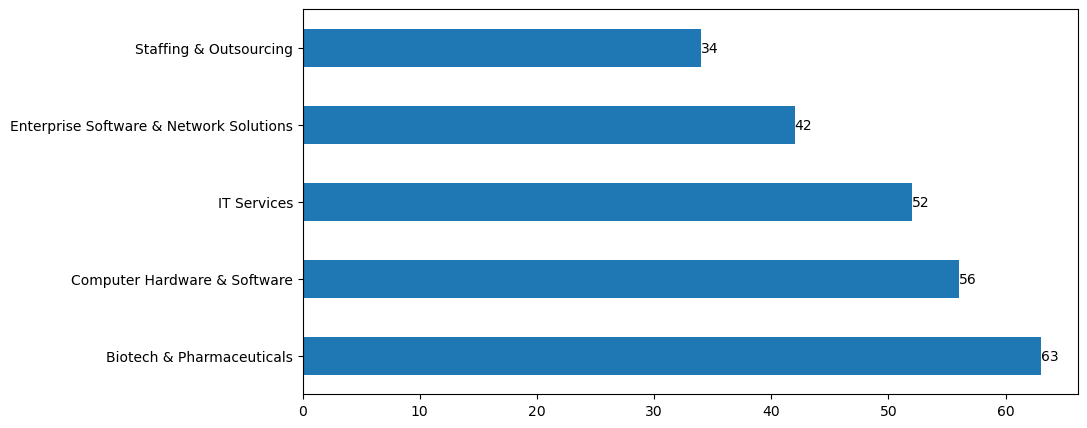

In [370]:
#Draw the barplot
plt.figure(figsize=(10, 5))
ax = top_industries.plot(kind='barh')

for bars in ax.containers:
    ax.bar_label(bars)

## 2. Analyze the distribution of job opportunities based on geographic regions.

In [349]:
df['Location'].value_counts().head(10)

San Francisco, CA    43
New York, NY         41
Boston, MA           23
Chicago, IL          19
Washington, DC       18
Cambridge, MA        16
Herndon, VA          11
McLean, VA           10
United States         9
Chantilly, VA         8
Name: Location, dtype: int64

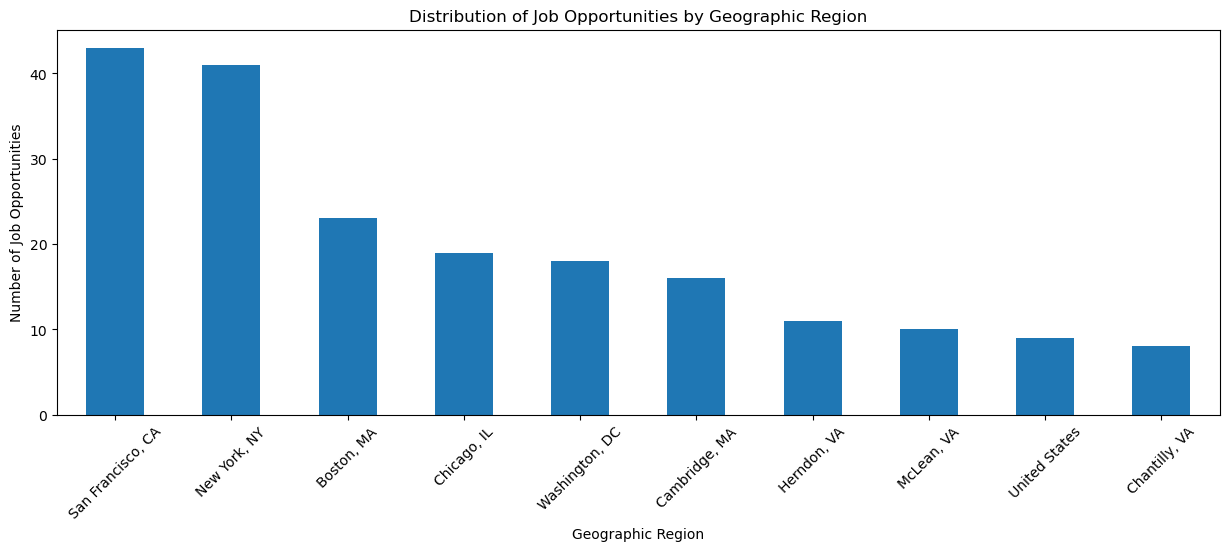

In [350]:
# Count the occurrences of job opportunities in each geographic region
job_opportunities_by_region = df['Location'].value_counts().head(10)

# Plot the distribution of job opportunities by geographic region
plt.figure(figsize=(15, 5))
job_opportunities_by_region.plot(kind='bar')
plt.title('Distribution of Job Opportunities by Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Number of Job Opportunities')
plt.xticks(rotation=45)
plt.show()

## 3. See min & max average salary range for different job positions across the industries.

In [351]:
# Extract job title, industry, salary estimation, and location columns
data = df[['Job Title', 'Industry', 'Salary Estimate', 'Location']]

# Clean the salary estimation column to extract numeric values
data['Salary Estimate'] = data['Salary Estimate'].str.replace('[^\d.]', '', regex=True)
data['Salary Estimate'] = data['Salary Estimate'].replace('', np.nan)

# Convert salary estimation column to numeric data type
data['Salary Estimate'] = pd.to_numeric(data['Salary Estimate'])

# Calculate the average salary for each job position across industries and regions
avg_salary = data.groupby(['Job Title', 'Industry', 'Location']).mean().reset_index()

# Determine the minimum and maximum average salary range for each job position across industries
min_max_salary = avg_salary.groupby(['Industry'])['Salary Estimate'].agg(['min', 'max']).reset_index()
min_max_salary

,Industry,min,max
0,Advertising & Marketing,5697.0,138158.000000
1,Aerospace & Defense,3156.0,158749.000000
2,Architectural & Engineering Services,91150.0,141225.000000
3,Banks & Credit Unions,83136.0,138158.000000
4,Biotech & Pharmaceuticals,5697.0,212331.000000
5,"Cable, Internet & Telephone Providers",90109.0,90109.000000
6,Chemical Manufacturing,71434.0,137171.000000
7,Colleges & Universities,74131.5,74131.500000
8,Computer Hardware & Software,47910.5,145225.000000
9,Construction,41644.0,41644.000000


In [352]:
avg_salary

,Job Title,Industry,Location,Salary Estimate
0,(Sr.) Data Scientist -,Banks & Credit Unions,Utah,83136.000000
1,AI Data Scientist,Federal Agencies,"McLean, VA",90109.000000
2,AI Ops Data Scientist,Biotech & Pharmaceuticals,"Gaithersburg, MD",94459.000000
3,"AI/ML - Machine Learning Scientist, Siri Under...",Computer Hardware & Software,"Santa Clara, CA",92155.000000
4,Analytics - Business Assurance Data Analyst,Lending,"Cedar Rapids, IA",91706.666667
...,...,...,...,...
377,Statistical Scientist,Biotech & Pharmaceuticals,"South San Francisco, CA",5697.000000
378,Tableau Data Engineer 20-0117,Enterprise Software & Network Solutions,"Chicago, IL",90109.000000
379,"VP, Data Science",Research & Development,"New York, NY",41151.500000
380,"Vice President, Biometrics and Clinical Data M...",Biotech & Pharmaceuticals,"South San Francisco, CA",138158.000000


## 4. Check the most in-demand skills across industries.

In [371]:
# Extract job title and job description columns
data = df[['Job Title', 'Job Description']]

# Instantiate the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10)

# Fit and transform the job descriptions
word_counts = vectorizer.fit_transform(data['Job Description'])

# Get the feature names (skills)
feature_names = vectorizer.get_feature_names()

# Calculate the total count of each skill across all job descriptions
skill_counts = word_counts.sum(axis=0)

# Create a DataFrame to store the skills and their counts
skills_df = pd.DataFrame({'Skill': feature_names, 'Count': skill_counts.tolist()[0]})

# Sort the DataFrame by skill count in descending order
skills_df = skills_df.sort_values(by='Count', ascending=False)

# Display the top skills
skills_df.head(10)

,Skill,Count
2,data,6147
3,experience,2802
9,work,1338
6,science,1270
1,business,1267
4,learning,1213
8,team,1190
7,skills,1044
5,machine,1000
0,analysis,786


## 5. Academic qualifications preferred by companies.

In [372]:
# Extract job title and job description columns
data = df[['Job Title', 'Job Description']]

# Define a list of common academic qualifications
academic_qualifications = ['Bachelor', 'Master', 'PhD']

# Initialize a dictionary to store the counts of each academic qualification
qualification_counts = {qualification: 0 for qualification in academic_qualifications}

# Iterate over the job descriptions and count the occurrences of each academic qualification
for description in data['Job Description']:
    for qualification in academic_qualifications:
        if re.search(r'\b' + qualification + r'\b', description, flags=re.IGNORECASE):
            qualification_counts[qualification] += 1

# Create a DataFrame to store the academic qualifications and their counts
qualifications_df = pd.DataFrame({'Qualification': qualification_counts.keys(), 'Count': qualification_counts.values()})

# Sort the DataFrame by count in descending order
qualifications_df = qualifications_df.sort_values(by='Count', ascending=False)

# Display the distribution of academic qualifications preferred by companies
qualifications_df

,Qualification,Count
0,Bachelor,170
2,PhD,106
1,Master,100


## 6. Check how a candidate's years of experience in a job role have influenced.

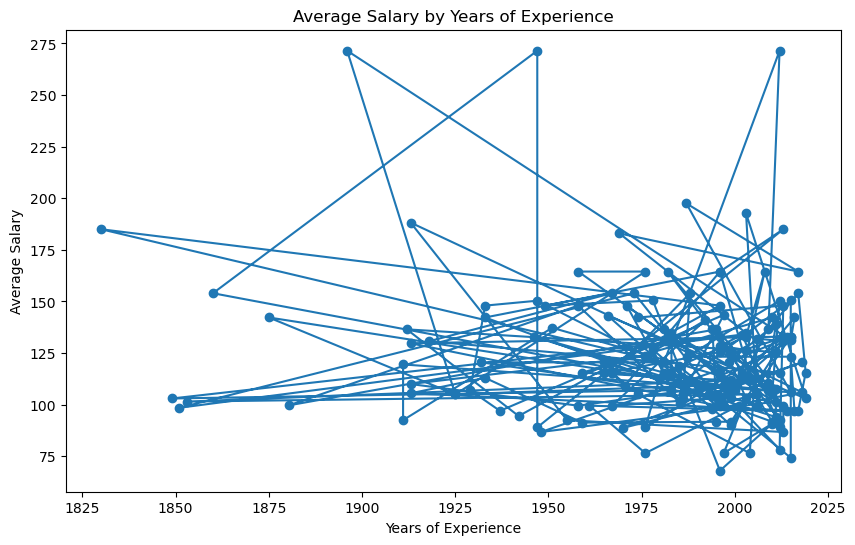

In [355]:
# Extract the relevant columns
data = df[['Job Title', 'Salary Estimate', 'Job Description', 'Location', 'Founded']]

# Define a function to extract the salary range from the 'Salary Estimate' column
def extract_salary(row):
    # Use regular expressions to find the salary values
    pattern = r'\$([\d,]+)K\s*-\s*\$([\d,]+)K'
    match = re.search(pattern, row['Salary Estimate'])
    if match:
        min_salary = int(match.group(1).replace(',', ''))
        max_salary = int(match.group(2).replace(',', ''))
        return (min_salary + max_salary) / 2
    else:
        return None

# Apply the function to extract the average salary
data['Average Salary'] = data.apply(extract_salary, axis=1)

# Convert 'Founded' column to numeric data type
data['Founded'] = pd.to_numeric(data['Founded'], errors='coerce')

# Group the data by 'Job Title' and calculate the average salary and years of experience
avg_salary = data.groupby('Job Title')['Average Salary'].mean()
avg_experience = data.groupby('Job Title')['Founded'].mean()

# Plot the relationship between average years of experience and average salary
plt.figure(figsize=(10, 6))
plt.plot(avg_experience, avg_salary, marker='o')
plt.title('Average Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.show()

## 7. Analyze the spread of the various companies ratings

In [356]:
df['Company Name'].value_counts().head(5)

Tempus Labs\n3.3                 11
AstraZeneca\n4.0                 10
Klaviyo\n4.8                      8
Autodesk\n4.0                     7
Phoenix Operations Group\n5.0     7
Name: Company Name, dtype: int64

In [357]:
pattern = r'(\d+\.\d+)'  # Regular expression pattern to match ratings (assuming ratings are in decimal format)
df['Rating'] = df['Company Name'].str.extract(pattern).astype(float)

# Print the extracted ratings
print(df['Rating'])

0      3.1
1      4.2
2      3.8
3      3.5
4      2.9
      ... 
663    4.1
665    3.8
666    4.0
667    3.6
671    2.7
Name: Rating, Length: 551, dtype: float64


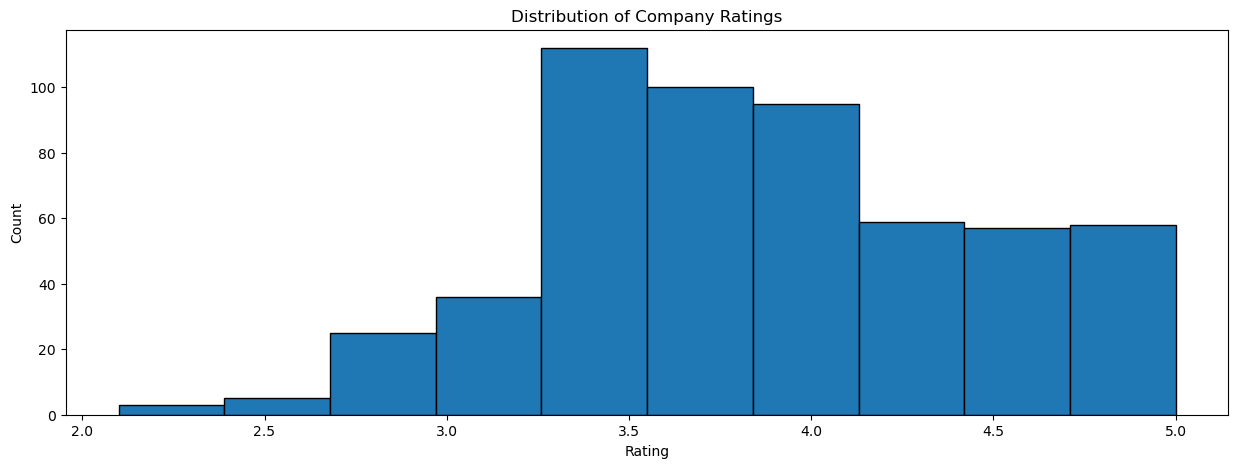

Average Rating: 3.8769090909090944
Maximum Rating: 5.0
Minimum Rating: 2.1


In [358]:
# Analyze the spread of company ratings
rating_counts = df['Rating'].value_counts()
average_rating = df['Rating'].mean()
max_rating = df['Rating'].max()
min_rating = df['Rating'].min()

# Visualize the spread of company ratings
plt.figure(figsize=(15, 5))
plt.hist(df['Rating'], bins=10, edgecolor='black')
plt.title('Distribution of Company Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

print("Average Rating:", average_rating)
print("Maximum Rating:", max_rating)
print("Minimum Rating:", min_rating)

## 8. Analyze the distribution of the ownership of companies

In [359]:
df['Type of ownership'].value_counts().head(5)

Company - Private                 335
Company - Public                  131
Nonprofit Organization             35
Subsidiary or Business Segment     28
Government                          9
Name: Type of ownership, dtype: int64

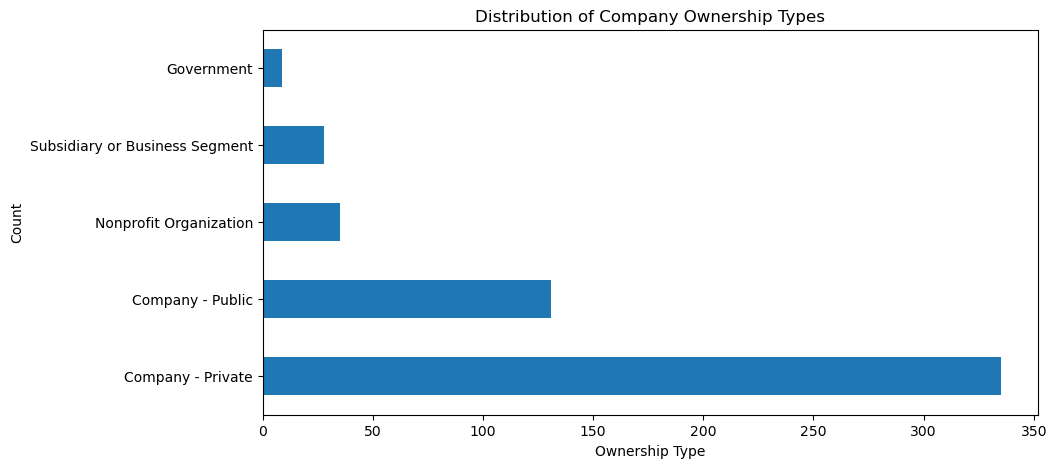

In [360]:
# Extract the 'Type of ownership' column
ownership_counts = df['Type of ownership'].value_counts().head(5)

# Plot the distribution of ownership types
plt.figure(figsize=(10, 5))
ownership_counts.plot(kind='barh')
plt.title('Distribution of Company Ownership Types')
plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.show()

## 9. Identify the max and min revenue spread across the industries

In [361]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            171
$100 to $500 million (USD)           91
$10+ billion (USD)                   61
$10 to $25 million (USD)             40
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             35
$2 to $5 billion (USD)               33
$50 to $100 million (USD)            31
$500 million to $1 billion (USD)     19
$1 to $5 million (USD)               18
$5 to $10 billion (USD)               7
$5 to $10 million (USD)               7
Less than $1 million (USD)            2
Name: Revenue, dtype: int64

In [375]:
# Group the dataset by industry and calculate the maximum and minimum revenue
revenue_stats = df.groupby('Industry')['Revenue'].agg(['max', 'min'])

# Display the maximum and minimum revenue spread across industries
revenue_stats

,max,min
Industry,,
Advertising & Marketing,Unknown / Non-Applicable,$10 to $25 million (USD)
Aerospace & Defense,Unknown / Non-Applicable,$1 to $2 billion (USD)
Architectural & Engineering Services,$10+ billion (USD),$1 to $2 billion (USD)
Banks & Credit Unions,Unknown / Non-Applicable,$1 to $2 billion (USD)
Biotech & Pharmaceuticals,Unknown / Non-Applicable,$1 to $5 million (USD)
"Cable, Internet & Telephone Providers",$10+ billion (USD),$10+ billion (USD)
Chemical Manufacturing,$500 million to $1 billion (USD),$1 to $2 billion (USD)
Colleges & Universities,Unknown / Non-Applicable,Unknown / Non-Applicable
Computer Hardware & Software,Unknown / Non-Applicable,$1 to $2 billion (USD)


## 10. View of startups, medium firms and big firms

In [363]:
df['Size'].value_counts()

51 to 200 employees        117
1001 to 5000 employees     102
201 to 500 employees        84
10000+ employees            75
501 to 1000 employees       72
5001 to 10000 employees     49
1 to 50 employees           48
Unknown                      4
Name: Size, dtype: int64

In [373]:
# Clean the 'Size' column to categorize companies into size categories
df['Size'] = df['Size'].str.replace('employees', '').str.strip()

# Define the size categories and their respective counts
size_categories = ['1 to 50', '51 to 200', '201 to 500', '501 to 1000', '1001 to 5000', '5001 to 10000', '10000+']
size_counts = df['Size'].value_counts().reindex(size_categories, fill_value=0)
size_counts

1 to 50           48
51 to 200        117
201 to 500        84
501 to 1000       72
1001 to 5000     102
5001 to 10000     49
10000+            75
Name: Size, dtype: int64

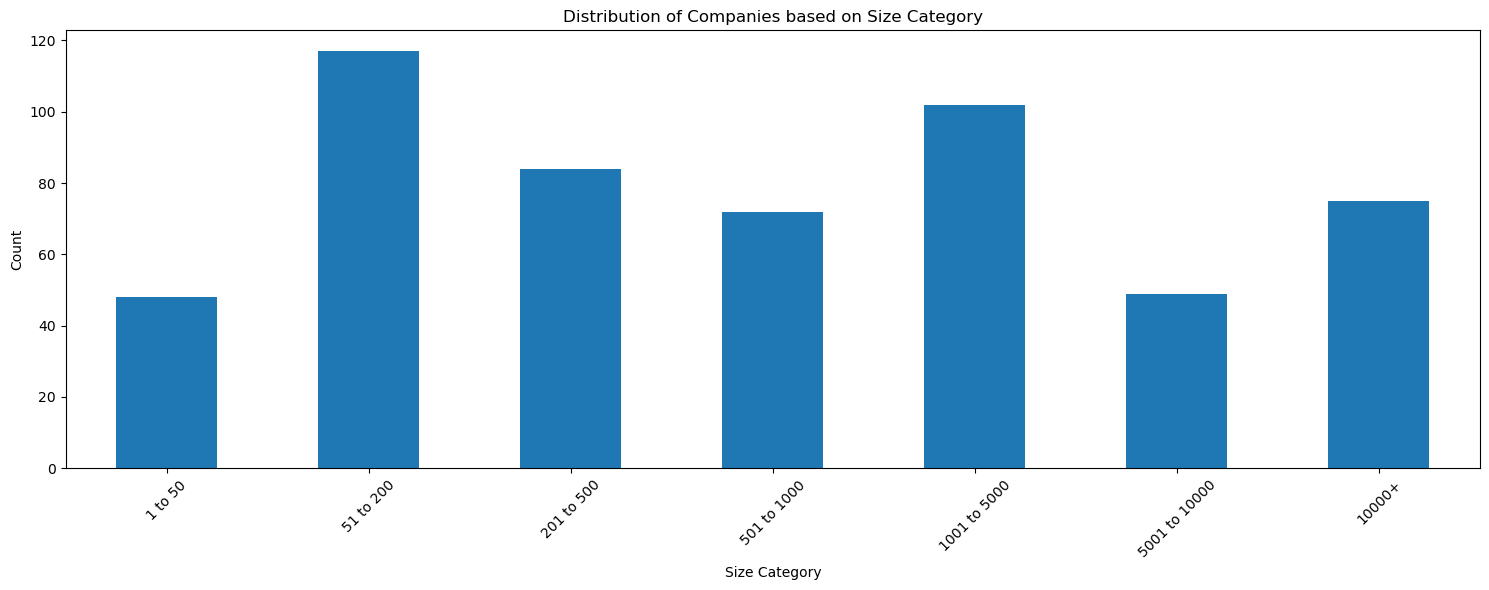

In [374]:
# Plot the distribution of companies based on size category
plt.figure(figsize=(15, 6))
size_counts.plot(kind='bar')
plt.title('Distribution of Companies based on Size Category')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion:-

1. The analysis revealed a high demand for data science professionals, with a significant number of job opportunities available across various industries and sectors.

2. Python emerged as the dominant programming language for data science, with libraries such as Pandas, NumPy, and Matplotlib widely used for data manipulation, analysis, and visualization.

3. Skills such as machine learning, statistical analysis, data visualization, and SQL were identified as crucial for data science roles. Technologies like TensorFlow, Scikit-learn, and Tableau were also in high demand.